In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [57]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [31]:
X = df.drop(['target'], axis=1)
y = df['target'].to_numpy().reshape(-1, 1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_n = scaler.fit_transform(X_train)
X_test_n = scaler.transform(X_test)

## DecisionTree

In [33]:
from sklearn.tree import DecisionTreeClassifier
from time import time
tempo = []
t = time()
DT = DecisionTreeClassifier()
DT.fit(X_train_n, y_train)
fim = time() - t
tempo.append(fim)

In [34]:
t = time()
y_predict = DT.predict(X_test_n)
fim = time() - t
tempo.append(fim)

In [35]:
from sklearn.metrics import accuracy_score
A = accuracy_score(y_test, y_predict)
print(f'A acurácia foi de: {round(A*100, 2)}%')

A acurácia foi de: 93.86%


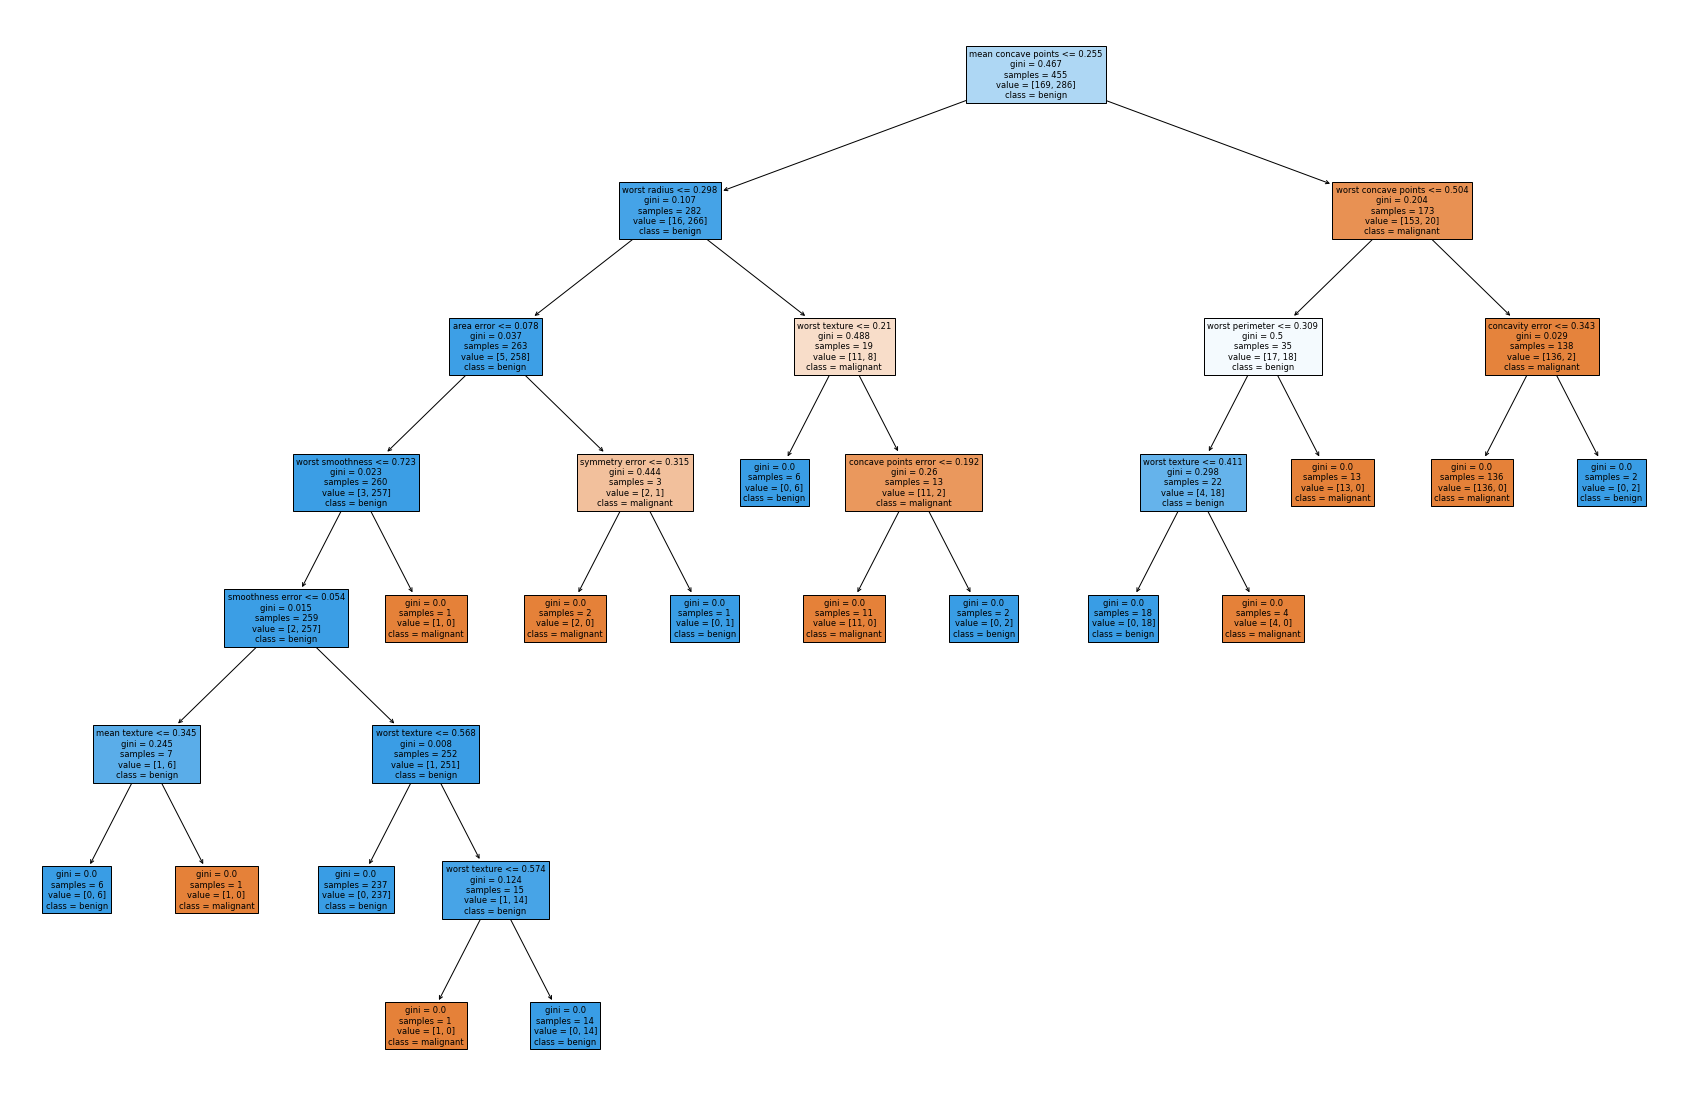

In [60]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,20))
plot_tree(DT, feature_names = X.columns,class_names=data.target_names,filled=True);

## RandomForest

In [36]:
from sklearn.ensemble import RandomForestClassifier
t = time()
RF = RandomForestClassifier()
RF.fit(X_train_n, y_train.ravel())
fim = time() - t
tempo.append(fim)

In [37]:
t = time()
y_predict2 = RF.predict(X_test_n)
fim = time() - t
tempo.append(fim)

In [38]:
A2 = accuracy_score(y_test, y_predict2)
print(f'A acurácia foi de: {round(A2*100, 2)}%')

A acurácia foi de: 96.49%


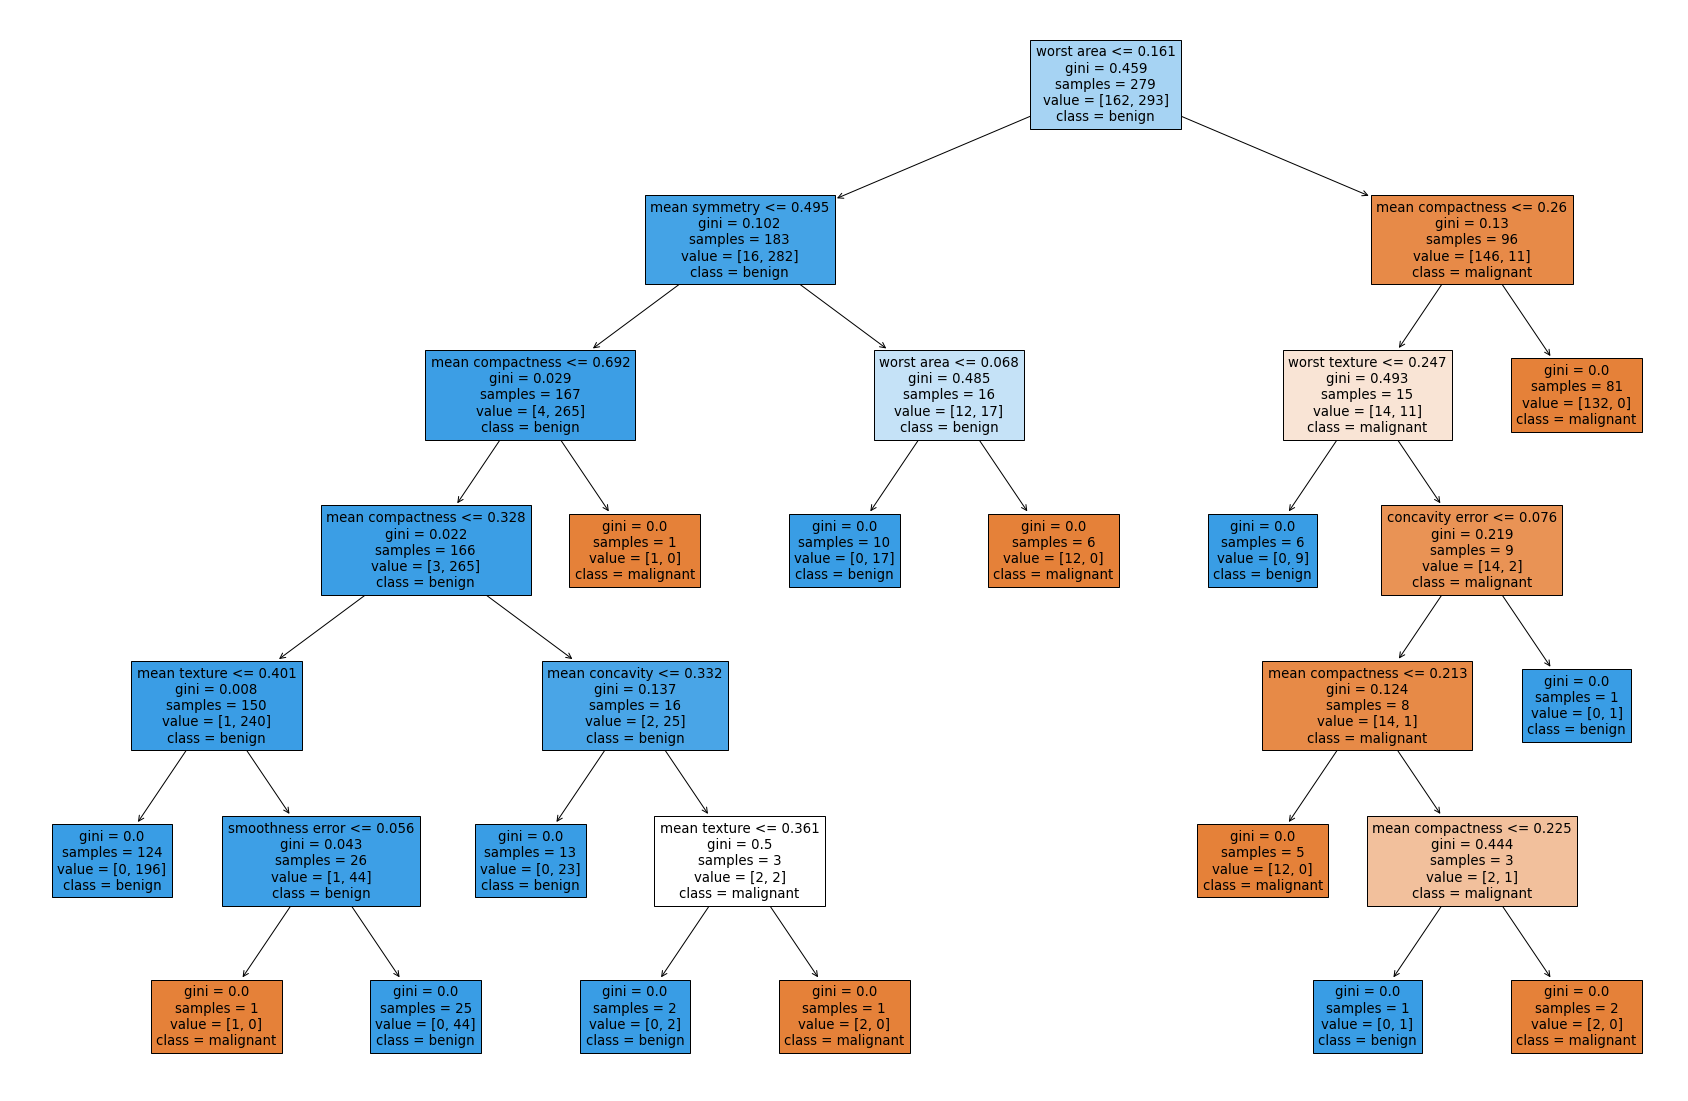

In [66]:
plt.figure(figsize=(30,20))
plot_tree(RF.estimators_[56], feature_names = X.columns,class_names=data.target_names,filled=True);

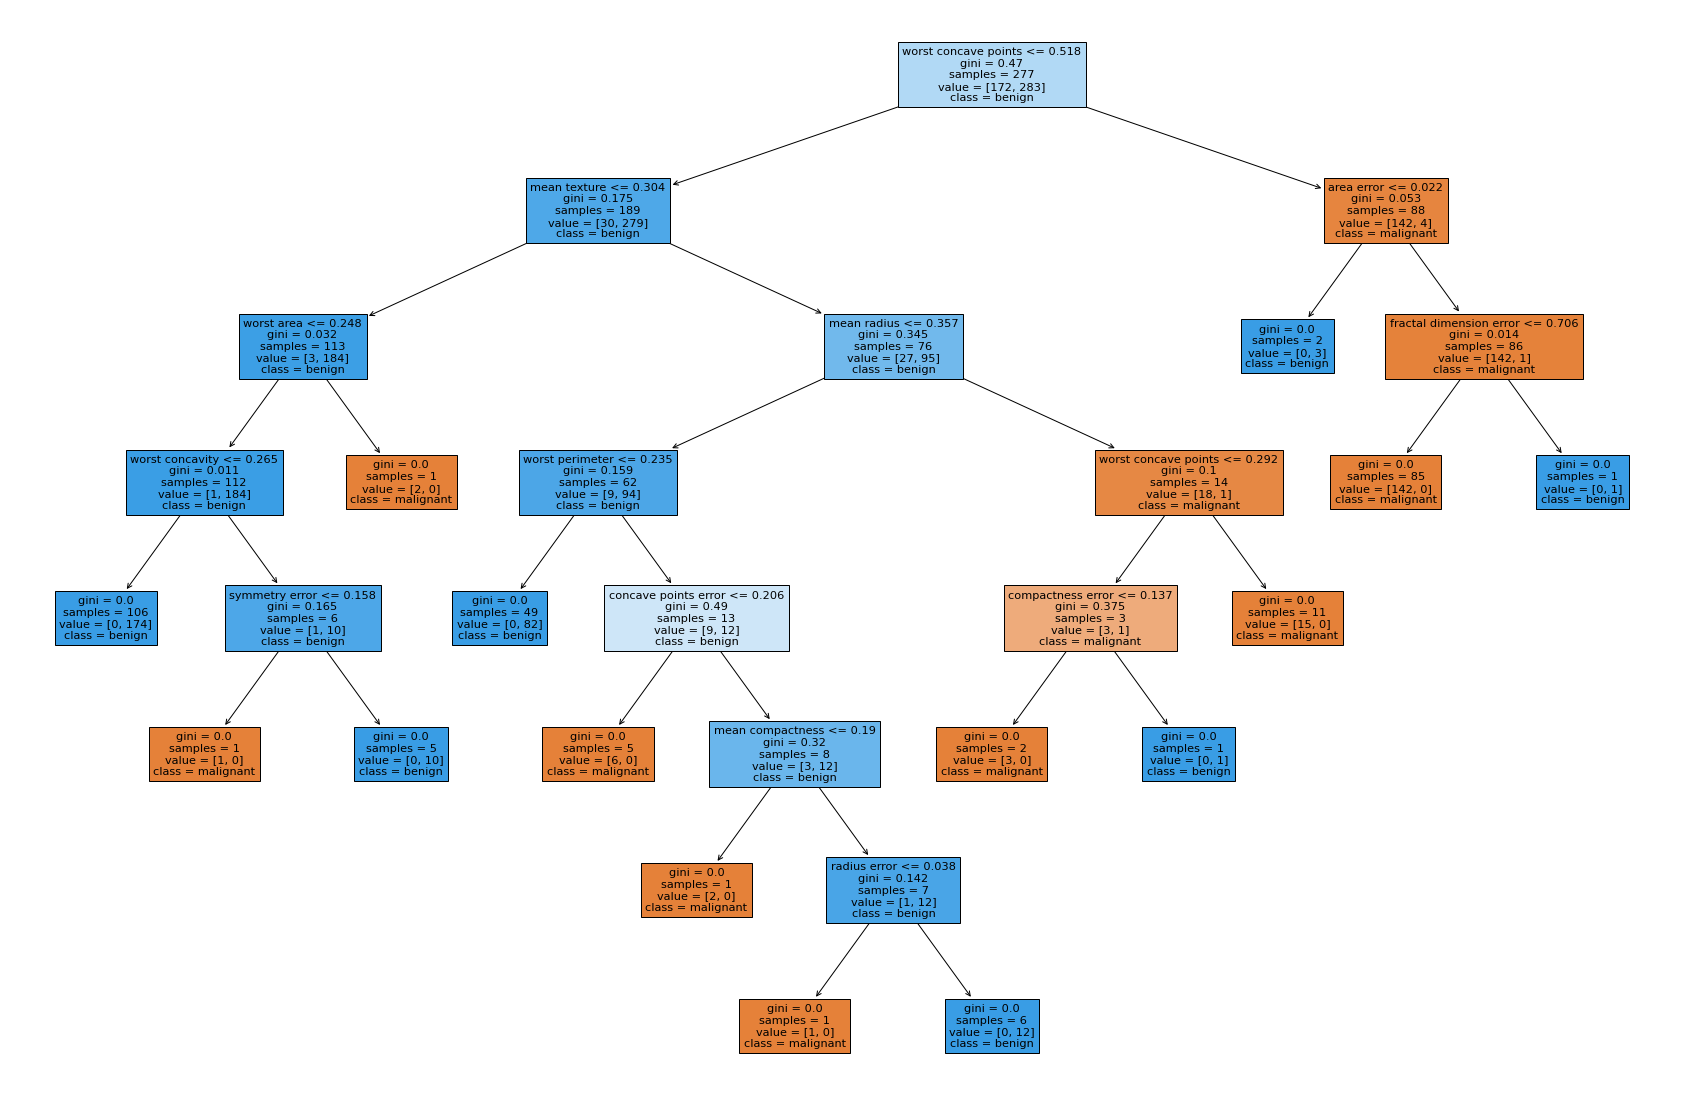

In [67]:
plt.figure(figsize=(30,20))
plot_tree(RF.estimators_[87], feature_names = X.columns,class_names=data.target_names,filled=True);

## Comparação de tempo

In [39]:
l = ['DecisionTree Treino', 'DecisionTree Predição', 'RandomForest Treino', 'RandomForest Predição']
l2 = np.arange(len(l))

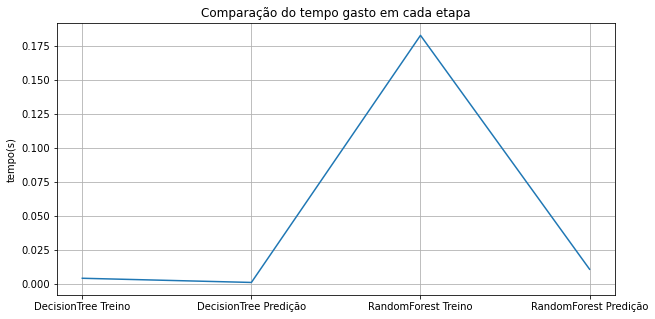

In [40]:
plt.subplots(figsize=(10, 5))
plt.plot(l2, tempo)
plt.xticks(l2,l)
plt.grid(True)
plt.ylabel("tempo(s)")
plt.title('Comparação do tempo gasto em cada etapa', fontsize=12)
plt.show()

## Tabela com todos os resultados

In [41]:
t_totalDT = tempo[0] + tempo[1]
t_totalRF = tempo[2] + tempo[3]

In [44]:
data = {'Modelos': ['DecisionTree', 'RandomForest'],
        'accuracy(%)': [round(A*100, 2), round(A2*100,2)],
        'Tempo total': [t_totalDT, t_totalRF],
        'Tempo de treino': [tempo[0], tempo[2]],
        'tempo de predição': [tempo[1], tempo[3]]
        }
tabela = pd.DataFrame(data)
tabela

,Modelos,accuracy(%),Tempo total,Tempo de treino,tempo de predição
0,DecisionTree,93.86,0.004895,0.003988,0.000907
1,RandomForest,96.49,0.193667,0.183030,0.010637
